In [1]:
#Load libraries
import os
import pandas as pd
import numpy as np
from fancyimpute import KNN   
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import seaborn as sns
from random import randrange, uniform

Using TensorFlow backend.


In [2]:
#Set working directory
os.chdir(r'D:\Edwisor')
os.getcwd()

'D:\\Edwisor'

In [3]:
#Load data
marketing_train = pd.read_csv("marketing_train.csv")

In [4]:
#Exploratory Data Analysis
marketing_train['schooling'] = marketing_train['schooling'].replace("illiterate", "unknown")
marketing_train['schooling'] = marketing_train['schooling'].replace(["basic.4y","basic.6y","basic.9y","high.school","professional.course"], "high.school")
marketing_train['default'] = marketing_train['default'].replace("yes", "unknown")
marketing_train['marital'] = marketing_train['marital'].replace("unknown", "married")
marketing_train['month'] = marketing_train['month'].replace(["sep","oct","mar","dec"], "dec")
marketing_train['month'] = marketing_train['month'].replace(["aug","jul","jun","may","nov"], "jun")
marketing_train['loan'] = marketing_train['loan'].replace("unknown", "no")
marketing_train['profession'] = marketing_train['profession'].replace(["management","unknown","unemployed","admin."], "admin.")
marketing_train['profession'] = marketing_train['profession'].replace(["blue-collar","housemaid","services","self-employed","entrepreneur","technician"], "blue-collar")

## Missing Value Analysis


In [5]:
#Create dataframe with missing percentage
missing_val = pd.DataFrame(marketing_train.isnull().sum())

#Reset index
missing_val = missing_val.reset_index()

#Rename variable
missing_val = missing_val.rename(columns = {'index': 'Variables', 0: 'Missing_percentage'})

#Calculate percentage
missing_val['Missing_percentage'] = (missing_val['Missing_percentage']/len(marketing_train))*100

#descending order
missing_val = missing_val.sort_values('Missing_percentage', ascending = False).reset_index(drop = True)

#save output results 
missing_val.to_csv("Mising_perc_py.csv", index = False)

In [6]:
missing_val

,Variables,Missing_percentage
0,schooling,29.066631
1,custAge,24.332344
2,day_of_week,9.589965
3,previous,0.000000
4,pastEmail,0.000000
5,pmonths,0.000000
6,nr.employed,0.000000
7,euribor3m,0.000000
8,cons.conf.idx,0.000000
9,cons.price.idx,0.000000


In [7]:
#imputation method
#Actual value = 29
#Mean = 40.01
#Median = 38
#KNN = 29.35

#create missing value
#marketing_train['custAge'].loc[70] = np.nan

In [8]:
#Impute with mean
#marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].mean())

#Impute with median
#marketing_train['custAge'] = marketing_train['custAge'].fillna(marketing_train['custAge'].median())

In [9]:
#KNN imputation
#Assigning levels to the categories
lis = []
for i in range(0, marketing_train.shape[1]):
    #print(i)
    if(marketing_train.iloc[:,i].dtypes == 'object'):
        marketing_train.iloc[:,i] = pd.Categorical(marketing_train.iloc[:,i])
        #print(marketing_train[[i]])
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].cat.codes 
        marketing_train.iloc[:,i] = marketing_train.iloc[:,i].astype('object')
        
        lis.append(marketing_train.columns[i])
        

In [10]:
lis

['profession',
 'marital',
 'schooling',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'responded']

In [11]:
#replace -1 with NA to impute
for i in range(0, marketing_train.shape[1]):
    marketing_train.iloc[:,i] = marketing_train.iloc[:,i].replace(-1, np.nan) 

In [12]:
#Apply KNN imputation algorithm
marketing_train = pd.DataFrame(KNN(k = 3).fit_transform(marketing_train), columns = marketing_train.columns)

#.complete attribute is depricated and replaced with .fit_transform

Imputing row 1/7414 with 0 missing, elapsed time: 19.745
Imputing row 101/7414 with 1 missing, elapsed time: 19.754
Imputing row 201/7414 with 0 missing, elapsed time: 19.763
Imputing row 301/7414 with 1 missing, elapsed time: 19.771
Imputing row 401/7414 with 0 missing, elapsed time: 19.779
Imputing row 501/7414 with 0 missing, elapsed time: 19.786
Imputing row 601/7414 with 0 missing, elapsed time: 19.796
Imputing row 701/7414 with 1 missing, elapsed time: 19.803
Imputing row 801/7414 with 1 missing, elapsed time: 19.812
Imputing row 901/7414 with 1 missing, elapsed time: 19.819
Imputing row 1001/7414 with 0 missing, elapsed time: 19.828
Imputing row 1101/7414 with 1 missing, elapsed time: 19.837
Imputing row 1201/7414 with 1 missing, elapsed time: 19.846
Imputing row 1301/7414 with 1 missing, elapsed time: 19.855
Imputing row 1401/7414 with 0 missing, elapsed time: 19.863
Imputing row 1501/7414 with 1 missing, elapsed time: 19.872
Imputing row 1601/7414 with 1 missing, elapsed time:

In [13]:
marketing_train

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0.0,2.0,1.000000,1.0,0.0,0.0,0.0,2.0,1.0,...,0.0,1.0,-0.1,93.200,-42.0,4.191,5195.8,999.0,0.0,0.0
1,42.333333,1.0,1.0,0.333333,0.0,0.0,0.0,0.0,2.0,1.0,...,0.0,1.0,1.4,93.918,-42.7,4.960,5228.1,999.0,0.0,0.0
2,42.000000,1.0,1.0,0.000000,0.0,0.0,0.0,1.0,2.0,1.0,...,0.0,1.0,1.1,93.994,-36.4,4.857,5191.0,999.0,0.0,0.0
3,55.000000,0.0,0.0,0.655738,1.0,2.0,1.0,0.0,2.0,4.0,...,0.0,1.0,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,0.0
4,37.598795,0.0,0.0,1.000000,0.0,2.0,0.0,0.0,2.0,3.0,...,1.0,0.0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33.000000,1.0,2.0,0.000000,0.0,0.0,0.0,1.0,2.0,4.0,...,0.0,1.0,1.1,93.994,-36.4,4.859,5191.0,999.0,0.0,0.0
7410,45.000000,1.0,1.0,0.000000,1.0,0.0,0.0,1.0,2.0,3.0,...,0.0,1.0,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,0.0
7411,27.000000,1.0,2.0,0.666553,0.0,0.0,0.0,0.0,2.0,0.0,...,1.0,0.0,-1.8,92.893,-46.2,1.250,5099.1,999.0,3.0,0.0
7412,51.000000,0.0,0.0,0.000000,1.0,2.0,0.0,0.0,2.0,2.0,...,0.0,1.0,-0.1,93.200,-42.0,4.076,5195.8,999.0,0.0,0.0


In [14]:
#Convert into proper datatypes
for i in lis:
    marketing_train.loc[:,i] = marketing_train.loc[:,i].round()
    marketing_train.loc[:,i] = marketing_train.loc[:,i].astype('object')
    
marketing_train

,custAge,profession,marital,schooling,default,housing,loan,contact,month,day_of_week,...,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,55.000000,0,2,1,1,0,0,0,2,1,...,0.0,1,-0.1,93.200,-42.0,4.191,5195.8,999.0,0.0,0
1,42.333333,1,1,0,0,0,0,0,2,1,...,0.0,1,1.4,93.918,-42.7,4.960,5228.1,999.0,0.0,0
2,42.000000,1,1,0,0,0,0,1,2,1,...,0.0,1,1.1,93.994,-36.4,4.857,5191.0,999.0,0.0,0
3,55.000000,0,0,1,1,2,1,0,2,4,...,0.0,1,1.4,93.918,-42.7,4.962,5228.1,999.0,0.0,0
4,37.598795,0,0,1,0,2,0,0,2,3,...,1.0,0,-1.8,92.893,-46.2,1.291,5099.1,999.0,1.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7409,33.000000,1,2,0,0,0,0,1,2,4,...,0.0,1,1.1,93.994,-36.4,4.859,5191.0,999.0,0.0,0
7410,45.000000,1,1,0,1,0,0,1,2,3,...,0.0,1,1.4,93.918,-42.7,4.961,5228.1,999.0,0.0,0
7411,27.000000,1,2,1,0,0,0,0,2,0,...,1.0,0,-1.8,92.893,-46.2,1.250,5099.1,999.0,3.0,0
7412,51.000000,0,0,0,1,2,0,0,2,2,...,0.0,1,-0.1,93.200,-42.0,4.076,5195.8,999.0,0.0,0


## Outlier Analysis

In [15]:
df = marketing_train.copy()
#marketing_train = df.copy()

In [16]:
marketing_train.dtypes

custAge           float64
profession         object
marital            object
schooling          object
default            object
housing            object
loan               object
contact            object
month              object
day_of_week        object
campaign          float64
pdays             float64
previous          float64
poutcome           object
emp.var.rate      float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail         float64
responded          object
dtype: object

In [17]:
pd.crosstab(marketing_train['pdays'], marketing_train['previous'])

previous,0.0,1.0,2.0,3.0,4.0,5.0,6.0
pdays,,,,,,,
0.0,0,2,0,0,0,0,0
1.0,0,2,0,0,1,0,0
2.0,0,9,4,0,0,0,0
3.0,0,48,19,9,3,2,1
4.0,0,14,5,2,1,0,0
5.0,0,4,3,0,0,0,0
6.0,0,38,27,14,4,2,0
7.0,0,6,7,2,0,0,0
8.0,0,3,0,0,0,0,0


{'whiskers': [<matplotlib.lines.Line2D at 0x246903f6a88>,
 'caps': [<matplotlib.lines.Line2D at 0x24690402648>,
 'boxes': [<matplotlib.lines.Line2D at 0x246903f60c8>],
 'medians': [<matplotlib.lines.Line2D at 0x24690406348>],
 'fliers': [<matplotlib.lines.Line2D at 0x24690406988>],
 'means': []}

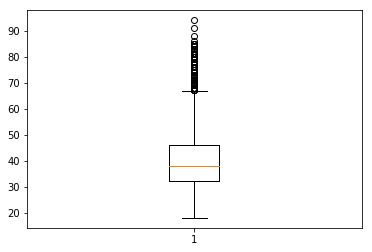

In [18]:
# #Plot boxplot to visualize Outliers
%matplotlib inline  
plt.boxplot(marketing_train['custAge'])

In [19]:
#save numeric names
cnames =  ["custAge", "campaign", "pdays", "previous", "emp.var.rate", "cons.price.idx", "cons.conf.idx", "euribor3m",
           "nr.employed", "pmonths", "pastEmail"]

In [20]:
# #Detect and delete outliers from data
#for i in cnames:
#     print(i)
#     q75, q25 = np.percentile(marketing_train.loc[:,i], [75 ,25])
#     iqr = q75 - q25
#     min = q25 - (iqr*1.5)
#     max = q75 + (iqr*1.5)
#     print(min)
#     print(max)
    
#     marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i] < min].index)
#     marketing_train = marketing_train.drop(marketing_train[marketing_train.loc[:,i] > max].index)

In [21]:
#Detect and replace with NA
# #Extract quartiles
q75, q25 = np.percentile(marketing_train['custAge'], [75 ,25])

# #Calculate IQR
iqr = q75 - q25

# #Calculate inner and outer fence
minimum = q25 - (iqr*1.5)
maximum = q75 + (iqr*1.5)

# #Replace with NA
marketing_train.loc[marketing_train['custAge'] < minimum,:'custAge'] = np.nan
marketing_train.loc[marketing_train['custAge'] > maximum,:'custAge'] = np.nan

# #Calculate missing value
missing_val = pd.DataFrame(marketing_train.isnull().sum())
print("missing values",missing_val)

# #Impute with KNN
marketing_train = pd.DataFrame(KNN(k = 3).fit_transform(marketing_train), columns = marketing_train.columns)

missing values                   0
custAge         100
profession        0
marital           0
schooling         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
pmonths           0
pastEmail         0
responded         0
Imputing row 1/7414 with 0 missing, elapsed time: 17.822
Imputing row 101/7414 with 0 missing, elapsed time: 17.823
Imputing row 201/7414 with 0 missing, elapsed time: 17.824
Imputing row 301/7414 with 0 missing, elapsed time: 17.826
Imputing row 401/7414 with 0 missing, elapsed time: 17.827
Imputing row 501/7414 with 0 missing, elapsed time: 17.828
Imputing row 601/7414 with 0 missing, elapsed time: 17.828
Imputing row 701/7414 with 0 missing, elapsed time: 17.830
Imputing row 801/7414 with 1 missing, elapsed time: 17.

## Feature Selection

In [22]:
##Correlation analysis
#Correlation plot
df_corr = marketing_train.loc[:,cnames]

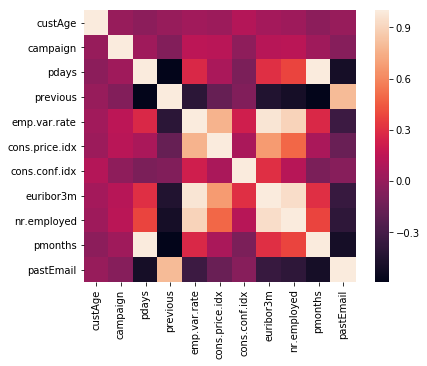

In [23]:
#Set the width and hieght of the plot
f, ax = plt.subplots(figsize=(7, 5))

#Generate correlation matrix
corr = df_corr.corr()

#Plot using seaborn library
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool),square=True, ax=ax)
#‘coolwarm'
#sns.diverging_palette(220, 10, as_cmap=True)

In [24]:
corr

,custAge,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
custAge,1.000000,0.006029,-0.028830,0.006762,0.045211,0.025391,0.113653,0.055492,0.030062,-0.028717,0.010471
campaign,0.006029,1.000000,0.041735,-0.066594,0.146298,0.133152,-0.022021,0.127949,0.137647,0.041713,-0.052595
pdays,-0.028830,0.041735,1.000000,-0.591964,0.277429,0.077198,-0.092059,0.303722,0.382731,0.999993,-0.504749
previous,0.006762,-0.066594,-0.591964,1.000000,-0.410066,-0.174499,-0.071466,-0.449660,-0.504471,-0.591997,0.798017
emp.var.rate,0.045211,0.146298,0.277429,-0.410066,1.000000,0.763827,0.225001,0.970955,0.899818,0.277365,-0.337106
cons.price.idx,0.025391,0.133152,0.077198,-0.174499,0.763827,1.000000,0.079007,0.670844,0.490632,0.076979,-0.161599
cons.conf.idx,0.113653,-0.022021,-0.092059,-0.071466,0.225001,0.079007,1.000000,0.304334,0.127341,-0.091987,-0.048684
euribor3m,0.055492,0.127949,0.303722,-0.449660,0.970955,0.670844,0.304334,1.000000,0.942545,0.303748,-0.361305
nr.employed,0.030062,0.137647,0.382731,-0.504471,0.899818,0.490632,0.127341,0.942545,1.000000,0.382838,-0.395847
pmonths,-0.028717,0.041713,0.999993,-0.591997,0.277365,0.076979,-0.091987,0.303748,0.382838,1.000000,-0.504698


In [25]:
np.zeros_like(corr, dtype=np.bool)

array([[False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, False, False,
        False, False],
       [False, False, False, False, False, False, False, Fal

In [26]:
#Chisquare test of independence
#Save categorical variables
cat_names = ["profession", "marital", "schooling", "default", "housing", "loan", "contact", "month", "day_of_week", "poutcome"]

In [27]:
#loop for chi square values
for i in cat_names:
    print(i)
    chi2, p, dof, ex = chi2_contingency(pd.crosstab(marketing_train['responded'], marketing_train[i]))
    print(p)

profession
1.6242589537712605e-34
marital
4.693435664866768e-05
schooling
4.071800591948163e-08
default
1.626010224096433e-15
housing
0.5469213692385477
loan
0.09547438986454948
contact
4.416434113838791e-36
month
3.3492292613263237e-139
day_of_week
0.038266146752773816
poutcome
3.898575747043989e-181


In [28]:
marketing_train = marketing_train.drop(['pdays', 'emp.var.rate', 'day_of_week', 'loan', 'housing'], axis=1)

## Feature Scaling

In [29]:
df1 = marketing_train.copy()
#marketing_train = df1.copy()

(array([3.193e+03, 0.000e+00, 0.000e+00, 0.000e+00, 1.953e+03, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 9.560e+02, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 4.770e+02, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 2.450e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        1.790e+02, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.000e+02,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 6.600e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 6.100e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 3.600e+01, 0.000e+00, 0.000e+00, 0.000e+00,
        3.800e+01, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 2.100e+01,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 1.400e+01, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 1.300e+01, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 7.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        8.000e+00, 0.000e+00, 0.000e+0

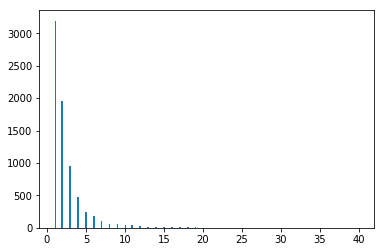

In [30]:
#Normality check
%matplotlib inline  
plt.hist(marketing_train['campaign'], bins='auto')

In [31]:
cnames = ["custAge","campaign","previous","cons.price.idx","cons.conf.idx","euribor3m","nr.employed",
           "pmonths","pastEmail"]

In [32]:
marketing_train[cnames]

,custAge,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,55.000000,1.0,0.0,93.200,-42.0,4.191,5195.8,999.0,0.0
1,42.333333,1.0,0.0,93.918,-42.7,4.960,5228.1,999.0,0.0
2,42.000000,1.0,0.0,93.994,-36.4,4.857,5191.0,999.0,0.0
3,55.000000,2.0,0.0,93.918,-42.7,4.962,5228.1,999.0,0.0
4,37.598795,5.0,1.0,92.893,-46.2,1.291,5099.1,999.0,1.0
...,...,...,...,...,...,...,...,...,...
7409,33.000000,3.0,0.0,93.994,-36.4,4.859,5191.0,999.0,0.0
7410,45.000000,3.0,0.0,93.918,-42.7,4.961,5228.1,999.0,0.0
7411,27.000000,2.0,1.0,92.893,-46.2,1.250,5099.1,999.0,3.0
7412,51.000000,2.0,0.0,93.200,-42.0,4.076,5195.8,999.0,0.0


In [33]:
marketing_train['custAge'].dtype


dtype('float64')

In [34]:
whos  # to show list of all variable in the workspace

Variable    Type    Data/Info
-----------------------------
cat_names   list    n=10
cnames      list    n=9
lis         list    n=11


In [35]:
#Nomalisation
for i in cnames:
    print(i)
    marketing_train[i] = (marketing_train[i] - min(marketing_train[i]))/(max(marketing_train[i])- min(marketing_train[i]))

custAge
campaign
previous
cons.price.idx
cons.conf.idx
euribor3m
nr.employed
pmonths
pastEmail


In [36]:
# #Standarisation
# for i in cnames:
#     print(i)
#     marketing_train[i] = (marketing_train[i] - marketing_train[i].mean())/marketing_train[i].std()

## Sampling Techniques

In [37]:
##Simple random sampling
#Sim_Sampling = marketing_train.sample(5000)

In [38]:
# ##Systematic Sampling
# #Calculate the K value
# k = len(marketing_train)/3500

# # Generate a random number using simple random sampling
# RandNum = randrange(0, 5)

# #select Kth observation starting from RandNum
# Sys_Sampling = marketing_train.iloc[RandNum::k, :]

#[RandNum::k,:] here "RandNum::k" means to select every kth row starting from index RandNum

In [39]:
# #Stratified sampling
# from sklearn.cross_validation import train_test_split

# #Select categorical variable
# y = marketing_train['profession']

#select subset using stratified Sampling
#Rest, Sample = train_test_split(marketing_train, test_size = 0.6, stratify = y)

In [40]:
#marketing_train = pd.read_csv("marketing_train_Model.csv")

## Model Development

In [41]:
#Import Libraries for decision tree
from sklearn import tree
from sklearn.metrics import accuracy_score
#from sklearn.cross_validation import train_test_split  <-depricated
from sklearn.model_selection import train_test_split

In [42]:
marketing_train.dtypes

custAge           float64
profession        float64
marital           float64
schooling         float64
default           float64
contact           float64
month             float64
campaign          float64
previous          float64
poutcome          float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail         float64
responded         float64
dtype: object

In [43]:
marketing_train.head()

,custAge,profession,marital,schooling,default,contact,month,campaign,previous,poutcome,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,responded
0,0.756636,0.0,2.0,1.0,1.0,0.0,2.0,0.000000,0.000000,1.0,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,0.0
1,0.497607,1.0,1.0,0.0,0.0,0.0,2.0,0.000000,0.000000,1.0,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,0.0
2,0.490791,1.0,1.0,0.0,0.0,1.0,2.0,0.000000,0.000000,1.0,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,0.0
3,0.756636,0.0,0.0,1.0,1.0,0.0,2.0,0.025641,0.000000,1.0,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,0.0
4,0.400788,0.0,0.0,1.0,0.0,0.0,2.0,0.102564,0.166667,0.0,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,0.0


In [44]:
#replace target categories with Yes or No
marketing_train['responded'] = marketing_train['responded'].replace(0, 'No')
marketing_train['responded'] = marketing_train['responded'].replace(1, 'Yes')

In [45]:
marketing_train.dtypes

custAge           float64
profession        float64
marital           float64
schooling         float64
default           float64
contact           float64
month             float64
campaign          float64
previous          float64
poutcome          float64
cons.price.idx    float64
cons.conf.idx     float64
euribor3m         float64
nr.employed       float64
pmonths           float64
pastEmail         float64
responded          object
dtype: object

In [46]:
#Divide data into train and test
X = marketing_train.values[:, 0:16]
Y = marketing_train.values[:,16]

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 0.2)

In [47]:
#Decision Tree
C50_model = tree.DecisionTreeClassifier(criterion='entropy').fit(X_train, y_train)

#predict new test cases
C50_Predictions = C50_model.predict(X_test)

#Create dot file to visualise tree  #http://webgraphviz.com/
dotfile = open("pt.dot", 'w')
df = tree.export_graphviz(C50_model, out_file=dotfile, feature_names = marketing_train.iloc[:,0:16].columns)

In [48]:
marketing_train.iloc[:,1:16].columns

Index(['profession', 'marital', 'schooling', 'default', 'contact', 'month',
       'campaign', 'previous', 'poutcome', 'cons.price.idx', 'cons.conf.idx',
       'euribor3m', 'nr.employed', 'pmonths', 'pastEmail'],
      dtype='object')

In [49]:
C50_Predictions

array(['Yes', 'No', 'No', ..., 'Yes', 'No', 'No'], dtype=object)

In [50]:
#build confusion matrix
from sklearn.metrics import confusion_matrix 
CM = confusion_matrix(y_test, C50_Predictions)
CM

array([[1180,  121],
       [ 110,   72]], dtype=int64)

In [51]:
CM = pd.crosstab(y_test, C50_Predictions, rownames = ["Actual"],colnames = ["Predicted"])
CM

Predicted,No,Yes
Actual,,
No,1180,121
Yes,110,72


In [52]:

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
print ("accuracy score :" , accuracy_score(y_test, C50_Predictions)*100)
#((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate 
FNR= (FN*100)/(FN+TP)
print('FNR :',FNR)

#Results
#Accuracy: 84.49
#FNR: 63

accuracy score : 84.42346594740391
FNR : 60.43956043956044


In [53]:
#Random Forest
from sklearn.ensemble import RandomForestClassifier

RF_model = RandomForestClassifier(n_estimators = 300).fit(X_train, y_train)

In [54]:
RF_Predictions = RF_model.predict(X_test)

In [55]:
#build confusion matrix
# from sklearn.metrics import confusion_matrix 
# CM = confusion_matrix(y_test, y_pred)
CM = pd.crosstab(y_test, RF_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
print ("accuracy score :" ,accuracy_score(y_test, RF_Predictions)*100)
((TP+TN)*100)/(TP+TN+FP+FN)

#False Negative rate
FNR = (FN*100)/(FN+TP)
print('FNR :', FNR)

#Accuracy: 88
#FNR: 72

accuracy score : 88.13216453135536
FNR : 68.68131868131869


In [56]:
marketing_train.columns[0:16]

Index(['custAge', 'profession', 'marital', 'schooling', 'default', 'contact',
       'month', 'campaign', 'previous', 'poutcome', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail'],
      dtype='object')

In [57]:
feature_imp = pd.Series(RF_model.feature_importances_,index=marketing_train.columns[0:16]).sort_values(ascending=False)
feature_imp

custAge           0.255623
euribor3m         0.208687
campaign          0.086690
nr.employed       0.064702
profession        0.050194
marital           0.047460
pmonths           0.045098
schooling         0.042111
poutcome          0.034719
cons.conf.idx     0.032886
cons.price.idx    0.030413
pastEmail         0.026483
month             0.024125
default           0.017433
previous          0.017282
contact           0.016094
dtype: float64

No handles with labels found to put in legend.


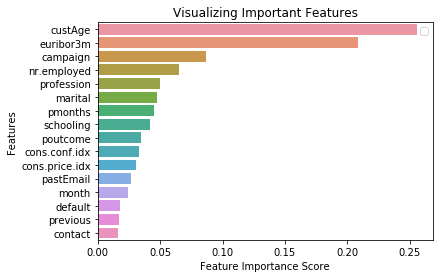

In [58]:
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
# Creating a bar plot
sns.barplot(x=feature_imp, y=feature_imp.index)
# Add labels to your graph
plt.xlabel('Feature Importance Score')
plt.ylabel('Features')
plt.title("Visualizing Important Features")
plt.legend()
plt.show()

In [59]:
#Let us prepare data for logistic regression
#replace target categories with Yes or No
marketing_train['responded'] = marketing_train['responded'].replace('No', 0)
marketing_train['responded'] = marketing_train['responded'].replace('Yes', 1)

In [60]:
#Create logistic data. Save target variable first
marketing_train_logit = pd.DataFrame(marketing_train['responded'])

In [61]:
marketing_train_logit.head()

,responded
0,0
1,0
2,0
3,0
4,0


In [62]:
#Add continous variables
marketing_train_logit = marketing_train_logit.join(marketing_train[cnames])

In [63]:
marketing_train_logit.head()

,responded,custAge,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail
0,0,0.756636,0.000000,0.000000,0.389322,0.368201,0.806393,0.877883,1.0,0.000000
1,0,0.497607,0.000000,0.000000,0.669135,0.338912,0.980730,1.000000,1.0,0.000000
2,0,0.490791,0.000000,0.000000,0.698753,0.602510,0.957379,0.859735,1.0,0.000000
3,0,0.756636,0.025641,0.000000,0.669135,0.338912,0.981183,1.000000,1.0,0.000000
4,0,0.400788,0.102564,0.166667,0.269680,0.192469,0.148946,0.512287,1.0,0.055556


In [64]:
##Create dummies for categorical variables
cat_names = ["profession", "marital", "schooling", "default", "contact", "month", "poutcome"]

for i in cat_names:
    temp = pd.get_dummies(marketing_train[i], prefix = i)
    marketing_train_logit = marketing_train_logit.join(temp)

In [65]:
marketing_train_logit.head()

,responded,custAge,campaign,previous,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,pmonths,pastEmail,...,default_0.0,default_1.0,contact_0.0,contact_1.0,month_0.0,month_1.0,month_2.0,poutcome_0.0,poutcome_1.0,poutcome_2.0
0,0,0.756636,0.000000,0.000000,0.389322,0.368201,0.806393,0.877883,1.0,0.000000,...,0,1,1,0,0,0,1,0,1,0
1,0,0.497607,0.000000,0.000000,0.669135,0.338912,0.980730,1.000000,1.0,0.000000,...,1,0,1,0,0,0,1,0,1,0
2,0,0.490791,0.000000,0.000000,0.698753,0.602510,0.957379,0.859735,1.0,0.000000,...,1,0,0,1,0,0,1,0,1,0
3,0,0.756636,0.025641,0.000000,0.669135,0.338912,0.981183,1.000000,1.0,0.000000,...,0,1,1,0,0,0,1,0,1,0
4,0,0.400788,0.102564,0.166667,0.269680,0.192469,0.148946,0.512287,1.0,0.055556,...,1,0,1,0,0,0,1,1,0,0


In [66]:
Sample_Index = np.random.rand(len(marketing_train_logit)) < 0.8

train = marketing_train_logit[Sample_Index]
test = marketing_train_logit[~Sample_Index]

In [67]:
Sample_Index

array([ True,  True,  True, ...,  True,  True,  True])

In [69]:
np.random.rand(10)<0.8

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True])

In [73]:
train.columns

Index(['responded', 'custAge', 'campaign', 'previous', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'pmonths', 'pastEmail',
       'profession_0.0', 'profession_1.0', 'profession_2.0', 'profession_3.0',
       'marital_0.0', 'marital_1.0', 'marital_2.0', 'schooling_0.0',
       'schooling_1.0', 'schooling_2.0', 'default_0.0', 'default_1.0',
       'contact_0.0', 'contact_1.0', 'month_0.0', 'month_1.0', 'month_2.0',
       'poutcome_0.0', 'poutcome_1.0', 'poutcome_2.0'],
      dtype='object')

In [74]:
#select column indexes for independent variables (not included 0 index as it is the target)
train_cols = train.columns[1:30]

In [76]:
#Build Logistic Regression
import statsmodels.api as sm

logit = sm.Logit(train['responded'], train[train_cols]).fit()

logit.summary()

Optimization terminated successfully.
         Current function value: 0.281361
         Iterations 22


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:              responded   No. Observations:                 5958
Model:                          Logit   Df Residuals:                     5935
Method:                           MLE   Df Model:                           22
Date:                Fri, 13 Nov 2020   Pseudo R-squ.:                  0.2203
Time:                        13:38:38   Log-Likelihood:                -1676.4
converged:                       True   LL-Null:                       -2150.1
Covariance Type:            nonrobust   LLR p-value:                2.884e-186
==================================================================================
                     coef    std err          z      P>|z|      [0.025      0.975]
----------------------------------------------------------------------------------
custAge            0.0745      0.279      0.267      0.790      -0.473       0.622
campaign          -1.4660      0.939     -1.561      0.118      -3.306       0.374
previous          -0.9777      1.015     -0.963      0.335      -2.967       1.012
cons.price.idx     2.2692      0.562      4.038      0.000       1.168       3.371
cons.conf.idx      1.5677      0.344      4.558      0.000       0.894       2.242
euribor3m         -3.5525      0.911     -3.898      0.000      -5.339      -1.766
nr.employed        1.4431      1.057      1.366      0.172      -0.628       3.514
pmonths           -1.7096      0.520     -3.286      0.001      -2.729      -0.690
pastEmail         -0.4936      0.737     -0.670      0.503      -1.938       0.951
profession_0.0    -0.4483        nan        nan        nan         nan         nan
profession_1.0    -0.4548        nan        nan        nan         nan         nan
profession_2.0    -0.0723        nan        nan        nan         nan         nan
profession_3.0     0.0774   2.84e+06   2.73e-08      1.000   -5.57e+06    5.57e+06
marital_0.0        1.0551   3.21e+07   3.29e-08      1.000   -6.29e+07    6.29e+07
marital_1.0        1.1312   3.21e+07   3.52e-08      1.000   -6.29e+07    6.29e+07
marital_2.0        1.2364   3.21e+07   3.85e-08      1.000   -6.29e+07    6.29e+07
schooling_0.0      0.4519        nan        nan        nan         nan         nan
schooling_1.0      0.5484        nan        nan        nan         nan         nan
schooling_2.0      0.9073        nan        nan        nan         nan         nan
default_0.0       -1.9121   1.95e+07   -9.8e-08      1.000   -3.83e+07    3.83e+07
default_1.0       -2.3165   1.95e+07  -1.19e-07      1.000   -3.83e+07    3.83e+07
contact_0.0        0.1377   1.13e+07   1.21e-08      1.000   -2.22e+07    2.22e+07
contact_1.0       -0.5345   1.13e+07  -4.71e-08      1.000   -2.22e+07    2.22e+07
month_0.0          0.0024   5.44e+06   4.46e-10      1.000   -1.07e+07    1.07e+07
month_1.0          0.1697   5.44e+06   3.12e-08      1.000   -1.07e+07    1.07e+07
month_2.0         -0.5689   5.44e+06  -1.05e-07      1.000   -1.07e+07    1.07e+07
poutcome_0.0      -0.5500   4.36e+06  -1.26e-07      1.000   -8.55e+06    8.55e+06
poutcome_1.0       0.0603   4.36e+06   1.38e-08      1.000   -8.55e+06    8.55e+06
poutcome_2.0       0.0930   4.36e+06   2.13e-08      1.000   -8.55e+06    8.55e+06
==================================================================================
"""

In [80]:
#Predict test data
test['Actual_prob'] = logit.predict(test[train_cols])

test['ActualVal'] = 1
test.loc[test.Actual_prob < 0.5, 'ActualVal'] = 0

C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  
C:\Users\dell\Anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


In [78]:
test['ActualVal'].head()

3     0
17    1
18    1
19    1
20    1
Name: ActualVal, dtype: int64

In [81]:
#Build confusion matrix
CM = pd.crosstab(test['responded'], test['ActualVal'])

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
((TP+TN)*100)/(TP+TN+FP+FN)

#(FN*100)/(FN+TP)

91.5521978021978

In [82]:
(FN*100)/(FN+TP)

71.32867132867133

#Accuracy: 91.55
#FNR: 71

In [61]:
#KNN implementation
from sklearn.neighbors import KNeighborsClassifier

KNN_model = KNeighborsClassifier(n_neighbors = 1).fit(X_train, y_train)

In [62]:
#predict test cases
KNN_Predictions = KNN_model.predict(X_test)

In [63]:
#build confusion matrix
CM = pd.crosstab(y_test, KNN_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
accuracy = ((TP+TN)*100)/(TP+TN+FP+FN)
print ("accuracy =" , accuracy)

#False Negative rate 
FNR =(FN*100)/(FN+TP)
print("FNR =" , FNR)

#Accuracy: 89 for k =9
#FNR: 77

accuracy = 85.77208361429534
FNR = 61.111111111111114


In [64]:
#Naive Bayes
from sklearn.naive_bayes import GaussianNB

#Naive Bayes implementation
NB_model = GaussianNB().fit(X_train, y_train)

In [65]:
#predict test cases
NB_Predictions = NB_model.predict(X_test)

In [66]:
#Build confusion matrix
CM = pd.crosstab(y_test, NB_Predictions)

#let us save TP, TN, FP, FN
TN = CM.iloc[0,0]
FN = CM.iloc[1,0]
TP = CM.iloc[1,1]
FP = CM.iloc[0,1]

#check accuracy of model
#accuracy_score(y_test, y_pred)*100
#((TP+TN)*100)/(TP+TN+FP+FN)

accuracy = ((TP+TN)*100)/(TP+TN+FP+FN)
print ("accuracy =" , accuracy)

#False Negative rate 
FNR =(FN*100)/(FN+TP)
print("FNR =" , FNR)


#Accuracy: 81
#FNR: 40

accuracy = 81.86109238031018
FNR = 48.148148148148145


## Cluster Analysis

In [ ]:
#Load data
df = pd.read_csv("df.csv")

In [ ]:
#Load required libraries
from sklearn.cluster import KMeans

#Estimate optimum number of clusters
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans(num_clusters).fit(df.iloc[:,0:4])
    cluster_errors.append(clusters.inertia_)
    
#Create dataframe with cluster errors
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [ ]:
#Plot line chart to visualise number of clusters
%matplotlib inline  
plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )

In [ ]:
#Implement kmeans
kmeans_model = KMeans(n_clusters = 3).fit(df.iloc[:,0:4])

In [ ]:
#Summarize output
pd.crosstab(df['Species'], kmeans_model.labels_)

In [ ]:
cluster_range = range( 1, 20 )
cluster_errors = []

for num_clusters in cluster_range:
    clusters = KMeans( num_clusters )
    clusters.fit( df.iloc[:,0:4] )
    cluster_errors.append( clusters.inertia_ )

In [ ]:
clusters_df = pd.DataFrame( { "num_clusters":cluster_range, "cluster_errors": cluster_errors } )

In [ ]:
%matplotlib inline  

plt.figure(figsize=(12,6))
plt.plot( clusters_df.num_clusters, clusters_df.cluster_errors, marker = "o" )